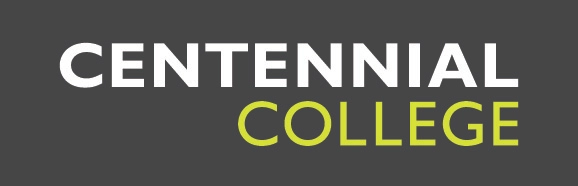

# Lab Assignment “Support Vector Machines”

## Assignment - exercise1:

### Importing All Libraries

In [65]:
import pandas as pd
import numpy as np
import time
import joblib
import matplotlib.pyplot as plt
import matplotlib as mpl
import scikitplot as skplt
import seaborn as sns
from seaborn import pairplot, heatmap
from scipy import stats
from scipy import stats, special
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils import check_random_state
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import linear_model
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

### Load & check the data:

In [66]:
data = pd.read_csv('breast_cancer.csv')

data_kareem = pd.DataFrame(data) # Putting this all into a dataframe.

In [67]:
data_kareem

,ID,thickness,size,shape,Marg,Epith,bare,b1,nucleoli,Mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [68]:
data_kareem.columns   # The name of columns

Index(['ID', 'thickness', 'size', 'shape', 'Marg', 'Epith', 'bare', 'b1',
       'nucleoli', 'Mitoses', 'class'],
      dtype='object')

In [69]:
data_kareem.info()   #  Information about the data including the index dtype and columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         699 non-null    int64 
 1   thickness  699 non-null    int64 
 2   size       699 non-null    int64 
 3   shape      699 non-null    int64 
 4   Marg       699 non-null    int64 
 5   Epith      699 non-null    int64 
 6   bare       699 non-null    object
 7   b1         699 non-null    int64 
 8   nucleoli   699 non-null    int64 
 9   Mitoses    699 non-null    int64 
 10  class      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [70]:
data_kareem.isna().sum()  # Any missing values?

ID           0
thickness    0
size         0
shape        0
Marg         0
Epith        0
bare         0
b1           0
nucleoli     0
Mitoses      0
class        0
dtype: int64

In [71]:
data_kareem.isnull().sum()   # Any null values?

ID           0
thickness    0
size         0
shape        0
Marg         0
Epith        0
bare         0
b1           0
nucleoli     0
Mitoses      0
class        0
dtype: int64

In [72]:
data_kareem.duplicated().sum()  # Any duplicated values?

8

In [73]:
data_kareem.describe(include='all')  # View statistical details.

,ID,thickness,size,shape,Marg,Epith,bare,b1,nucleoli,Mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [74]:
data_kareem['bare'].replace('?', np.nan)  # Replace the ?  

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare, Length: 699, dtype: object

In [75]:
data_kareem["bare"] = pd.to_numeric(data_kareem["bare"], errors='coerce', downcast="float")

# Convert on column to numeric(float)

In [76]:
data_kareem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         699 non-null    int64  
 1   thickness  699 non-null    int64  
 2   size       699 non-null    int64  
 3   shape      699 non-null    int64  
 4   Marg       699 non-null    int64  
 5   Epith      699 non-null    int64  
 6   bare       683 non-null    float32
 7   b1         699 non-null    int64  
 8   nucleoli   699 non-null    int64  
 9   Mitoses    699 non-null    int64  
 10  class      699 non-null    int64  
dtypes: float32(1), int64(10)
memory usage: 57.5 KB


In [77]:
data_kareem.fillna(data_kareem.median())  # Filling missing values with median

,ID,thickness,size,shape,Marg,Epith,bare,b1,nucleoli,Mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [78]:
data_kareem.drop(['ID'], axis=1, inplace=True)   # Drop the ID column
data_kareem.drop_duplicates  # Drop the duplicate values
data_kareem.dropna( axis=0, inplace=True)   # Drop the null values
data_kareem.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replacing infinite values

In [79]:
data_kareem

,thickness,size,shape,Marg,Epith,bare,b1,nucleoli,Mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


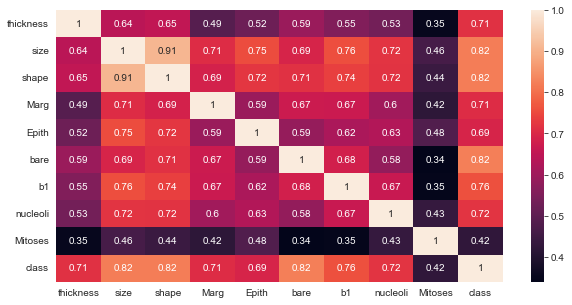

In [80]:
plt.figure(figsize=(10,5)) 
sns.heatmap(data_kareem.corr(), annot=True)
plt.show()

# Visulazing the correlation on a heatmap.

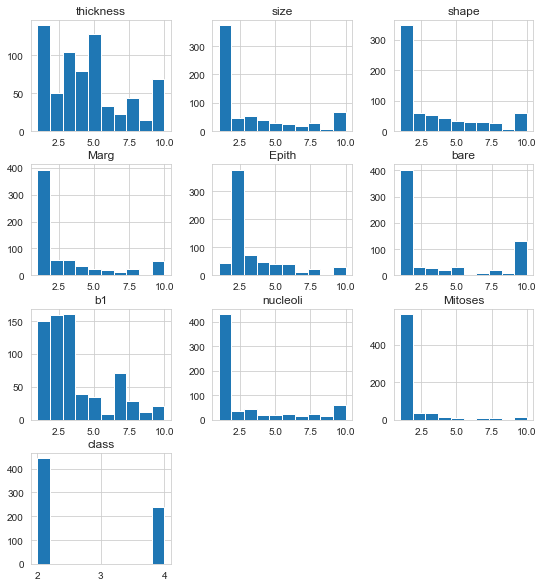

In [81]:
data_kareem.hist(figsize=(9, 10))     # Plotting the whole data on a histogram.
plt.show()

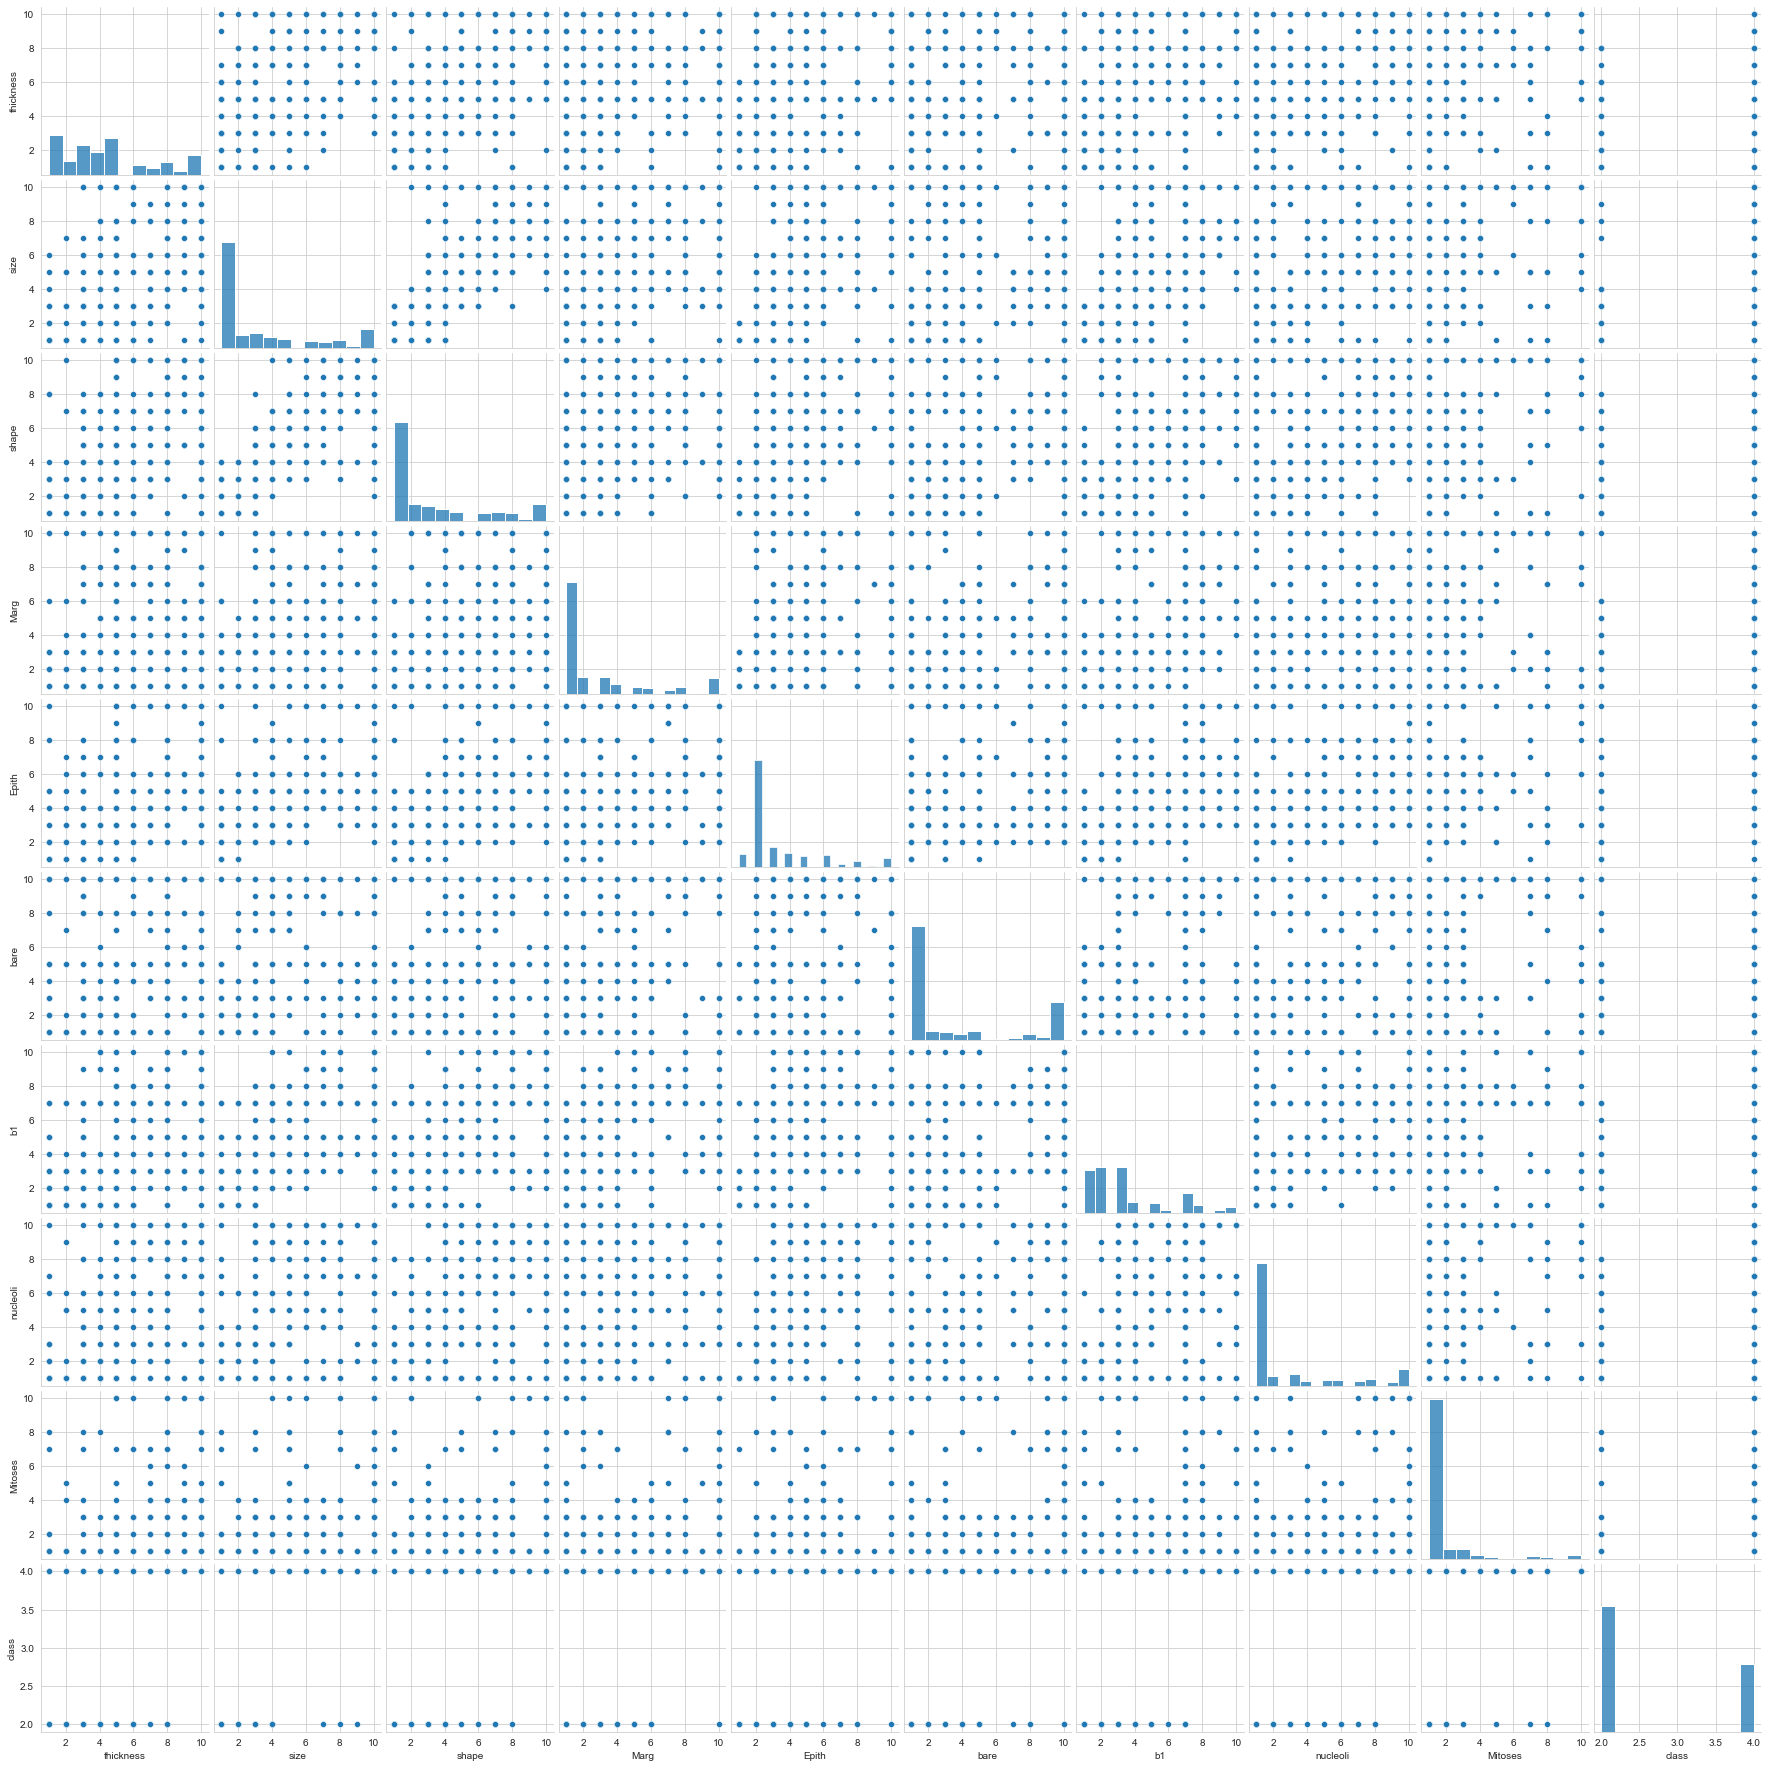

In [82]:
sns.pairplot(data_kareem);    # Plotting the whole data on seaborn pair plot.

D:\Goals\DATA\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


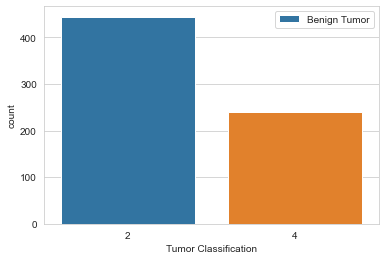

In [83]:
sns.countplot(data_kareem['class'], label="count")
plt.legend(['Benign Tumor', 'Malignant Tumor'])
plt.xlabel('Tumor Classification')
plt.show()

# Class distribution by counts of Benign(2) and Malignant(4)

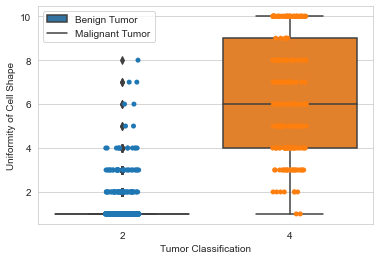

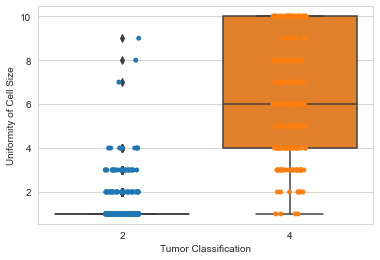

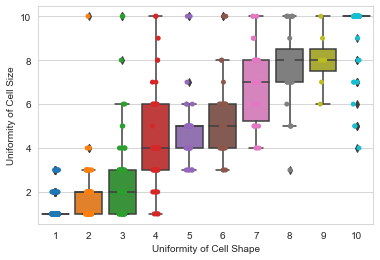

In [84]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='class',y='shape',data=data_kareem)
ax = sns.stripplot(x="class", y="shape",data=data_kareem)
plt.legend(['Benign Tumor', 'Malignant Tumor'])
plt.xlabel('Tumor Classification')
plt.ylabel('Uniformity of Cell Shape')
plt.show()


# Strong correlation between Uniformity of Cell Shape(shape) and Malignancy(class) 
# describe that Cancer cells are not consistent in shape, and greater uniformity indicates greater malignancy.


sns.set_style('whitegrid')
ax= sns.boxplot(x='class',y='size',data=data_kareem)
ax = sns.stripplot(x="class", y="size",data=data_kareem)
plt.xlabel('Tumor Classification')
plt.ylabel('Uniformity of Cell Size')
plt.show()


# Strong correlation between Uniformity of Cell Size(size) and Malignancy(class) 
# describe that Cancer cells are not consistent in size, and greater uniformity indicates greater malignancy.



sns.set_style('whitegrid')
ax= sns.boxplot(x='shape',y='size',data=data_kareem)
ax = sns.stripplot(x="shape", y="size",data=data_kareem)
plt.xlabel('Uniformity of Cell Shape')
plt.ylabel('Uniformity of Cell Size')
plt.show()


# Strong correlation between Uniformity of Cell Shape(shape) and Uniformity of Cell Size(size) 
# describe that cancer cells have irregular size and shape.

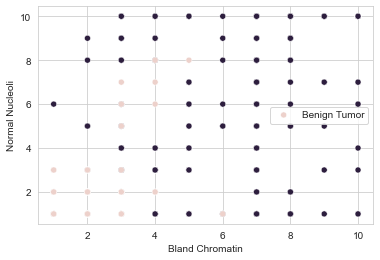

In [86]:
sns.scatterplot(x ='b1', y ='nucleoli', hue ='class', data = data_kareem)
plt.legend(['Benign Tumor'])
plt.xlabel('Bland Chromatin')
plt.ylabel('Normal Nucleoli')
plt.show()

# Moderate correlation between Bland Chromatin(b1) and Normal Nucleoli(nucleoli) 
# describe those higher adhesions has been linked to an increased risk of breast cancer.

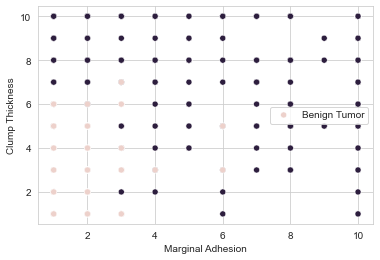

In [85]:
sns.scatterplot(x ='Marg', y ='thickness', hue ='class', data = data_kareem)
plt.legend(['Benign Tumor'])
plt.xlabel('Marginal Adhesion')
plt.ylabel('Clump Thickness')
plt.show()

# Weak correlation between Marginal Adhesion(Marg) and Clump Thickness(thickness) 
# describe the nucleus's homogeneous "texture" as seen in benign cells.

In [87]:
features = ['thickness', 'size', 'shape', 'Marg', 'Epith', 'bare', 'b1', 'nucleoli', 'Mitoses']

X_kareem = data_kareem[features]
y_kareem = data_kareem['class']


# Separate the features from the class
#X_kareem = np.array(data_kareem[features])
#y_kareem = np.array(data_kareem['class'])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_kareem, y_kareem, test_size = 0.20, random_state=18)   
# 20% for testing.

# Seed is last two digits of my ID 18

### Build Classification Models



### Support vector machine classifier with linear kernel

In [89]:
clf_linear_kareem = SVC(kernel='linear', C=0.1)
clf_linear_kareem.fit(X_kareem, y_kareem)         # Train an SVM classifier using the training data with linear kernel

SVC(C=0.1, kernel='linear')

In [90]:
clf_linear_kareem.fit(X_train, y_train)
clf_linear_kareem.score(X_train, y_train)  # Accuracy score for the model on the training set 

0.9743589743589743

In [91]:
clf_linear_kareem.fit(X_test, y_test)
clf_linear_kareem.score(X_test, y_test)   # Accuracy score for the model on the testing set

0.9854014598540146

[[348  15]
 [  7 176]]
AxesSubplot(0.125,0.125;0.62x0.755)


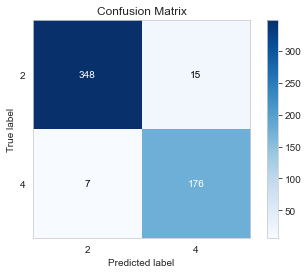

In [92]:
y_pred = clf_linear_kareem.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(skplt.metrics.plot_confusion_matrix(y_train, y_pred))     # Accuracy matrix for the training set 

[[79  2]
 [ 0 56]]
AxesSubplot(0.125,0.125;0.62x0.755)


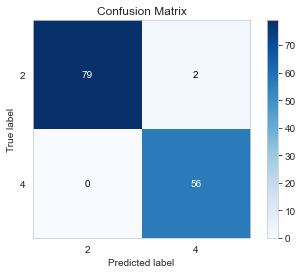

In [93]:
y_pred2 = clf_linear_kareem.predict(X_test)
print(confusion_matrix(y_test, y_pred2))
print(skplt.metrics.plot_confusion_matrix(y_test, y_pred2))     # Accuracy matrix for the testing set

### Support vector machine classifier with rbf kernel

In [94]:
clf_rbf_kareem = SVC(kernel='rbf')
clf_rbf_kareem.fit(X_kareem, y_kareem)   # Train an SVM classifier using the training data with rbf kernel

SVC()

In [95]:
clf_rbf_kareem.fit(X_train, y_train)
clf_rbf_kareem.score(X_train, y_train)  # Accuracy score for the model on the training set 

0.9798534798534798

In [96]:
clf_rbf_kareem.fit(X_test, y_test)
clf_rbf_kareem.score(X_test, y_test)   # Accuracy score for the model on the testing set

0.9854014598540146

[[351  12]
 [  3 180]]
AxesSubplot(0.125,0.125;0.62x0.755)


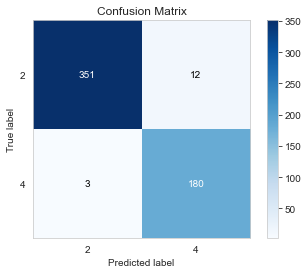

In [97]:
y_pred3 = clf_rbf_kareem.predict(X_train)
print(confusion_matrix(y_train, y_pred3))
print(skplt.metrics.plot_confusion_matrix(y_train, y_pred3))     # Accuracy matrix for the training set 

[[79  2]
 [ 0 56]]
AxesSubplot(0.125,0.125;0.62x0.755)


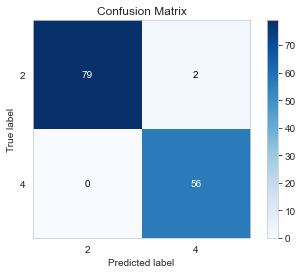

In [98]:
y_pred4 = clf_rbf_kareem.predict(X_test)
print(confusion_matrix(y_test, y_pred4))
print(skplt.metrics.plot_confusion_matrix(y_test, y_pred4))     # Accuracy matrix for the testing set

### Support vector machine classifier with poly kernel

In [99]:
clf_poly_kareem = SVC(kernel='poly')
clf_poly_kareem.fit(X_kareem, y_kareem)   # Train an SVM classifier using the training data with poly kernel

SVC(kernel='poly')

In [100]:
clf_poly_kareem.fit(X_train, y_train)
clf_poly_kareem.score(X_train, y_train)  # Accuracy score for the model on the training set 

0.9816849816849816

In [101]:
clf_poly_kareem.fit(X_test, y_test)
clf_poly_kareem.score(X_test, y_test)   # Accuracy score for the model on the testing set

0.9854014598540146

[[355   8]
 [ 11 172]]
AxesSubplot(0.125,0.125;0.62x0.755)


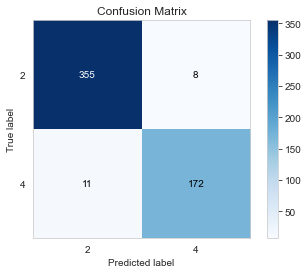

In [102]:
y_pred5 = clf_poly_kareem.predict(X_train)
print(confusion_matrix(y_train, y_pred5))
print(skplt.metrics.plot_confusion_matrix(y_train, y_pred5))     # Accuracy matrix for the training set 

[[81  0]
 [ 2 54]]
AxesSubplot(0.125,0.125;0.62x0.755)


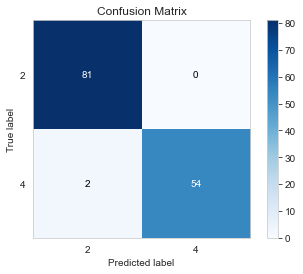

In [103]:
y_pred6 = clf_poly_kareem.predict(X_test)
print(confusion_matrix(y_test, y_pred6))
print(skplt.metrics.plot_confusion_matrix(y_test, y_pred6))     # Accuracy matrix for the testing set

### Support vector machine classifier with sigmoid kernel

In [104]:
clf_sigmoid_kareem = SVC(kernel='sigmoid')
clf_sigmoid_kareem.fit(X_kareem, y_kareem)   # Train an SVM classifier using the training data with sigmoid kernel

SVC(kernel='sigmoid')

In [105]:
clf_sigmoid_kareem.fit(X_train, y_train)
clf_sigmoid_kareem.score(X_train, y_train)  # Accuracy score for the model on the training set 

0.46703296703296704

In [106]:
clf_sigmoid_kareem.fit(X_test, y_test)
clf_sigmoid_kareem.score(X_test, y_test)   # Accuracy score for the model on the testing set

0.46715328467153283

[[255 108]
 [182   1]]
AxesSubplot(0.125,0.125;0.62x0.755)


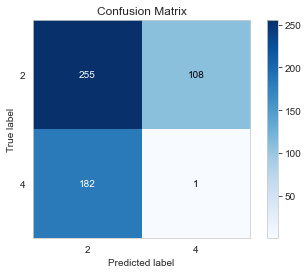

In [107]:
y_pred7 = clf_sigmoid_kareem.predict(X_train)
print(confusion_matrix(y_train, y_pred7))
print(skplt.metrics.plot_confusion_matrix(y_train, y_pred7))     # Accuracy matrix for the training set 

[[63 18]
 [55  1]]
AxesSubplot(0.125,0.125;0.62x0.755)


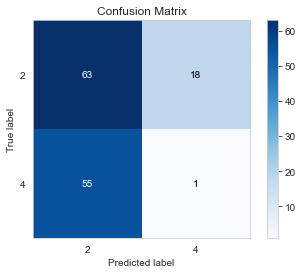

In [108]:
y_pred8 = clf_sigmoid_kareem.predict(X_test)
print(confusion_matrix(y_test, y_pred8))
print(skplt.metrics.plot_confusion_matrix(y_test, y_pred8))     # Accuracy matrix for the testing set

## Assignment - exercise2:

In [109]:
data = pd.read_csv('breast_cancer.csv')
data_kareem_df2 = pd.DataFrame(data) # Putting this all into a dataframe.

In [110]:
data_kareem_df2['bare'].replace('?', np.nan)  # Replace the ?  

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare, Length: 699, dtype: object

In [111]:
data_kareem_df2["bare"] = pd.to_numeric(data_kareem_df2["bare"], errors='coerce', downcast="float")

# Convert on column to numeric(float)

In [112]:
data_kareem_df2.drop(['ID'], axis=1, inplace=True)   # Drop the ID column
data_kareem_df2.drop_duplicates  # Drop the duplicate values
data_kareem_df2.dropna( axis=0, inplace=True)   # Drop the null values
data_kareem_df2.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replacing infinite values

In [113]:
features = ['thickness', 'size', 'shape', 'Marg', 'Epith', 'bare', 'b1', 'nucleoli', 'Mitoses']

X_kareem = data_kareem_df2[features]
y_kareem = data_kareem_df2['class']


# Separate the features from the class

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_kareem, y_kareem, test_size = 0.20, random_state=18)   
# 20% for testing.

# Seed is last two digits of my ID 18

In [115]:
pipe_svm_kareem = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])   # Pipeline tranformer

In [116]:
pipe_rf_kareem = Pipeline([("rf_classifier", RandomForestClassifier())])

In [117]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(data_kareem_df2)
SimpleImputer()

# Fill the missing values with the median using Simple Imputer

SimpleImputer()

In [118]:
sc = StandardScaler()
scaled_data = sc.fit_transform(data_kareem_df2)

# Scale the data using Standard Scaler

In [119]:
num_pipe_kareem = [pipe_svm_kareem, pipe_rf_kareem]

In [120]:
num_pipe_kareem    # The combined pipelines objects

[Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())]),
 Pipeline(steps=[('rf_classifier', RandomForestClassifier())])]

In [121]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear'],
             'degree' : [2, 3]} 


# Grid search parameters

In [122]:
grid_search_kareem = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, scoring='accuracy')

# Grid search

In [123]:
best_parameters = grid_search_kareem.fit(X_train, y_train)
# Fit grid search

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END C=0.01, degree=2, gamma=1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 2/5] END C=0.01, degree=2, gamma=1, kernel=rbf;, score=0.670 total time=   0.0s
[CV 3/5] END C=0.01, degree=2, gamma=1, kernel=rbf;, score=0.670 total time=   0.0s
[CV 4/5] END C=0.01, degree=2, gamma=1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 5/5] END C=0.01, degree=2, gamma=1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 1/5] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.945 total time=   0.0s
[CV 2/5] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.954 total time=   0.0s
[CV 3/5] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.963 total time=   0.0s
[CV 4/5] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.972 total time=   0.0s
[CV 5/5] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.954 total time=   0.0s
[CV 1/5] END C=0.01, degree=2, gamma=1, kernel=linear;, score=0.955 total time=   0.0s
[CV 2

[CV 3/5] END C=0.01, degree=3, gamma=0.001, kernel=rbf;, score=0.670 total time=   0.0s
[CV 4/5] END C=0.01, degree=3, gamma=0.001, kernel=rbf;, score=0.661 total time=   0.0s
[CV 5/5] END C=0.01, degree=3, gamma=0.001, kernel=rbf;, score=0.661 total time=   0.0s
[CV 1/5] END C=0.01, degree=3, gamma=0.001, kernel=poly;, score=0.664 total time=   0.0s
[CV 2/5] END C=0.01, degree=3, gamma=0.001, kernel=poly;, score=0.670 total time=   0.0s
[CV 3/5] END C=0.01, degree=3, gamma=0.001, kernel=poly;, score=0.670 total time=   0.0s
[CV 4/5] END C=0.01, degree=3, gamma=0.001, kernel=poly;, score=0.661 total time=   0.0s
[CV 5/5] END C=0.01, degree=3, gamma=0.001, kernel=poly;, score=0.661 total time=   0.0s
[CV 1/5] END C=0.01, degree=3, gamma=0.001, kernel=linear;, score=0.955 total time=   0.0s
[CV 2/5] END C=0.01, degree=3, gamma=0.001, kernel=linear;, score=0.972 total time=   0.0s
[CV 3/5] END C=0.01, degree=3, gamma=0.001, kernel=linear;, score=0.963 total time=   0.0s
[CV 4/5] END C=0.0

[CV 5/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf;, score=0.982 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.955 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.963 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.954 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.991 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.972 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.01, kernel=linear;, score=0.955 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.01, kernel=linear;, score=0.972 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.01, kernel=linear;, score=0.954 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.01, kernel=linear;, score=0.991 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.01, kernel=linear;, score=0.972 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamm

[CV 3/5] END C=1, degree=3, gamma=0.1, kernel=rbf;, score=0.982 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.1, kernel=rbf;, score=0.972 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=0.1, kernel=rbf;, score=0.954 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.936 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.954 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.945 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.927 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.936 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=0.1, kernel=linear;, score=0.955 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=0.1, kernel=linear;, score=0.972 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.1, kernel=linear;, score=0.954 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.1, kernel=linear;, score=0.991 total 

[CV 4/5] END C=10, degree=2, gamma=0.001, kernel=linear;, score=0.991 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.001, kernel=linear;, score=0.963 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=1, kernel=rbf;, score=0.908 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=1, kernel=rbf;, score=0.872 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=1, kernel=rbf;, score=0.890 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=1, kernel=poly;, score=0.936 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=1, kernel=poly;, score=0.954 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=1, kernel=poly;, score=0.945 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=1, kernel=poly;, score=0.927 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=1, kernel=poly;, score=0.936 total time=   0.

[CV 1/5] END C=100, degree=2, gamma=0.01, kernel=linear;, score=0.955 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=0.01, kernel=linear;, score=0.972 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=0.01, kernel=linear;, score=0.954 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.01, kernel=linear;, score=0.991 total time=   0.1s
[CV 5/5] END C=100, degree=2, gamma=0.01, kernel=linear;, score=0.963 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=0.001, kernel=rbf;, score=0.955 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=0.001, kernel=rbf;, score=0.972 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=0.001, kernel=rbf;, score=0.963 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.001, kernel=rbf;, score=0.991 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=0.001, kernel=rbf;, score=0.972 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=0.001, kernel=poly;, score=0.955 total time=   0.0s
[CV 2/5] END C=100, degree=2, ga

In [124]:
print(best_parameters.best_estimator_.get_params())
print("The mean accuracy of the model is:",best_parameters.score(X_test, y_test))

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
The mean accuracy of the model is: 0.9562043795620438


In [125]:
best_model_kareem = best_parameters.best_estimator_.get_params()

In [126]:
full_pipeline = 'final.sav'
joblib.dump(best_model_kareem, full_pipeline)

['final.sav']

In [127]:
! jupyter-nbconvert --to PDFviaHTML Lab_assignment_Support_Vector_Machines.ipynb

[NbConvertApp] Converting notebook Lab_assignment_Support_Vector_Machines.ipynb to PDFviaHTML
[NbConvertApp] Writing 1386312 bytes to Lab_assignment_Support_Vector_Machines.pdf


In [128]:
! jupyter nbconvert --to html Lab_assignment_Support_Vector_Machines.ipynb

[NbConvertApp] Converting notebook Lab_assignment_Support_Vector_Machines.ipynb to html
[NbConvertApp] Writing 1312163 bytes to Lab_assignment_Support_Vector_Machines.html
